# Energy Dataset Exploratory Data Analysis

This dataset is taken from a [Git Repository](https://github.com/LuisM78/Appliances-energy-prediction-data) of data for the publication:

Data driven prediction models of energy use of appliances in a low-energy house. Luis M. Candanedo, Véronique Feldheim, Dominique Deramaix. Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788, http://dx.doi.org/10.1016/j.enbuild.2017.01.083.

## The Task

Do an Exploratory Data Analysis on the energy dataset. <br> Keeping in mind : **Understand energy usage by appliances and the attributes that contribute to aggregate energy usage.**

### General Tips Followed 
> [Chloe Mawer, Jonathan Whitmore - Exploratory Data Analysis in Python - PyCon 2017](https://www.youtube.com/watch?v=W5WE9Db2RLU)

- Before plotting/joining/doing something, have a question or hypothesis that you want to investigate
- Draw a plot of what you want to see on paper to sketch the idea
- Write it down, then make the plan on how to get there
- How do you know you aren't fooling yourself
- What else can I check if this is actually true?
- What evidence could there be that it's wrong?

In [94]:
# Uncomment and run if any of the following libraries not available
!pip install tqdm
!pip install missingno
!pip install pandas_profiling

In [95]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
#import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
#from tqdm import tqdm
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

### Description of the Data Columns (Units)
> Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.
<table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <th class="align-left" scope="row">date, Date time stamp</th>
            <td class="align-left">year-month-day hour:min:s</td>
            <td class="align-char">–</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Appliances, Appliances energy consumption</th>
            <td class="align-left">Wh</td>
            <td class="align-char">1</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Lights, Light energy consumption</th>
            <td class="align-left">Wh</td>
            <td class="align-char">2</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T1, Temperature in kitchen area</th>
            <td class="align-left">°C</td>
            <td class="align-char">3</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_1, Humidity in kitchen area</th>
            <td class="align-left">%</td>
            <td class="align-char">4</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T2, Temperature in living room area</th>
            <td class="align-left">°C</td>
            <td class="align-char">5</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_2, Humidity in living room area</th>
            <td class="align-left">%</td>
            <td class="align-char">6</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T3, Temperature in laundry room area</th>
            <td class="align-left">°C</td>
            <td class="align-char">7</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_3, Humidity in laundry room area</th>
            <td class="align-left">%</td>
            <td class="align-char">8</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T4, Temperature in office room</th>
            <td class="align-left">°C</td>
            <td class="align-char">9</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_4, Humidity in office room</th>
            <td class="align-left">%</td>
            <td class="align-char">10</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T5, Temperature in bathroom</th>
            <td class="align-left">°C</td>
            <td class="align-char">11</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_5, Humidity in bathroom</th>
            <td class="align-left">%</td>
            <td class="align-char">12</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T6, Temperature outside the building (north side)</th>
            <td class="align-left">°C</td>
            <td class="align-char">13</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_6, Humidity outside the building (north side)</th>
            <td class="align-left">%</td>
            <td class="align-char">14</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T7, Temperature in ironing room</th>
            <td class="align-left">°C</td>
            <td class="align-char">15</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_7, Humidity in ironing room</th>
            <td class="align-left">%</td>
            <td class="align-char">16</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T8, Temperature in teenager room 2</th>
            <td class="align-left">°C</td>
            <td class="align-char">17</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_8, Humidity in teenager room 2</th>
            <td class="align-left">%</td>
            <td class="align-char">18</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T9, Temperature in parents room</th>
            <td class="align-left">°C</td>
            <td class="align-char">19</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_9, Humidity in parents room</th>
            <td class="align-left">%</td>
            <td class="align-char">20</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T_out, Temperature outside (from Chièvres weather station)</th>
            <td class="align-left">°C</td>
            <td class="align-char">21</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Press_mm_hg, Pressure (from Chièvres weather station)</th>
            <td class="align-left">mm Hg</td>
            <td class="align-char">22</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_out, Humidity outside (from Chièvres weather station)</th>
            <td class="align-left">%</td>
            <td class="align-char">23</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Windspeed, Windspeed (from Chièvres weather station)</th>
            <td class="align-left">m/s</td>
            <td class="align-char">24</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Visibility, Visibility (from Chièvres weather station)</th>
            <td class="align-left">km</td>
            <td class="align-char">25</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Tdewpoint, Dew point temp (from Chièvres weather station)</th>
            <td class="align-left">°C</td>
            <td class="align-char">26</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">rv1, Random Variable 1</th>
            <td class="align-left">Non dimensional</td>
            <td class="align-char">27</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">rv2, Random Variable 2</th>
            <td class="align-left">Non dimensional</td>
            <td class="align-char">28</td>
        </tr>
    </tbody>
</table>

In [96]:
# Loading the data from the Case Study GitHub
#df = pd.read_csv("https://raw.githubusercontent.com/eklavyasaxena/Advances-in-Data-Sciences-and-Architecture/master/ADS_CaseStudy_2/Data_for_EnergyCaseStudy/energydata_complete.csv")
df = pd.read_csv("C:\\Users\\amand\\Documents\\ADS\\Advances-in-Data-Sciences-and-Architecture\\ADS_CaseStudy_2\\Data_for_EnergyCaseStudy\\testing.csv")

In [97]:
df.shape

(4932, 32)

In [98]:
df.head()

date  Appliances  lights         T1       RH_1         T2  \
0  2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
1  2016-01-11 18:00:00          60      50  19.890000  45.766667  19.200000   
2  2016-01-11 18:40:00         230      70  19.926667  45.863333  19.356667   
3  2016-01-11 18:50:00         580      60  20.066667  46.396667  19.426667   
4  2016-01-11 19:30:00         100      10  20.566667  53.893333  20.033333   

        RH_2     T3       RH_3     T4     ...       Press_mm_hg     RH_out  \
0  44.590000  19.79  45.000000  18.89     ...        733.800000  92.000000   
1  44.500000  19.79  44.900000  18.89     ...        734.100000  92.000000   
2  44.400000  19.79  44.900000  18.89     ...        734.366667  91.333333   
3  44.400000  19.79  44.826667  19.00     ...        734.433333  91.166667   
4  46.756667  20.10  48.466667  19.00     ...        734.850000  89.500000   

   Windspeed  Visibility  Tdewpoint        rv1        rv2    NSM  WeekStatus  \
0   6.000000        51.5   5.000000  45.410389  45.410389  63000     Weekday   
1   5.000000        40.0   4.700000  47.233763  47.233763  64800     Weekday   
2   5.666667        40.0   4.633333  10.298729  10.298729  67200     Weekday   
3   5.833333        40.0   4.616667   8.827838   8.827838  67800     Weekday   
4   6.000000        40.0   4.350000  24.884962  24.884962  70200     Weekday   

   Day_of_week  
0       Monday  
1       Monday  
2       Monday  
3       Monday  
4       Monday  

[5 rows x 32 columns]

In [99]:
df.describe().T

count          mean           std         min           25%  \
Appliances   4932.0     96.745742    101.614097   10.000000     50.000000   
lights       4932.0      3.799676      7.923715    0.000000      0.000000   
T1           4932.0     21.693788      1.601049   16.790000     20.765625   
RH_1         4932.0     40.224623      3.972156   27.430000     37.290000   
T2           4932.0     20.337357      2.196585   16.100000     18.790000   
RH_2         4932.0     40.427517      4.080973   20.463333     37.900000   
T3           4932.0     22.282566      1.983027   17.200000     20.790000   
RH_3         4932.0     39.222545      3.260285   30.926667     36.863333   
T4           4932.0     20.855039      2.037373   15.100000     19.566667   
RH_4         4932.0     39.016532      4.346357   28.856667     35.500000   
T5           4932.0     19.613308      1.835305   15.340000     18.290000   
RH_5         4932.0     50.911806      8.950238   29.815000     45.445833   
T6           4932.0      7.880734      6.050349   -5.850000      3.566667   
RH_6         4932.0     54.565305     30.989932    1.000000     29.673333   
T7           4932.0     20.276699      2.094107   15.390000     18.703750   
RH_7         4932.0     35.390434      5.102789   23.230000     31.500000   
T8           4932.0     22.028947      1.948126   16.384444     20.790000   
RH_8         4932.0     42.971017      5.170284   29.856667     39.150833   
T9           4932.0     19.501044      2.005746   14.890000     18.000000   
RH_9         4932.0     41.583421      4.153739   29.166667     38.626071   
T_out        4932.0      7.407604      5.298588   -4.955556      3.700000   
Press_mm_hg  4932.0    755.581486      7.314446  729.500000    751.050000   
RH_out       4932.0     79.799329     14.737631   25.000000     70.833333   
Windspeed    4932.0      4.055605      2.493979    0.000000      2.000000   
Visibility   4932.0     38.332911     11.741537    1.000000     29.000000   
Tdewpoint    4932.0      3.772257      4.178050   -6.500000      0.912500   
rv1          4932.0     24.717745     14.539974    0.013539     12.338689   
rv2          4932.0     24.717745     14.539974    0.013539     12.338689   
NSM          4932.0  42670.437956  24854.920715    0.000000  21000.000000   

                      50%           75%           max  
Appliances      60.000000    100.000000   1070.000000  
lights           0.000000      0.000000     70.000000  
T1              21.600000     22.666667     26.260000  
RH_1            39.660000     42.975000     56.393333  
T2              20.000000     21.500000     29.666667  
RH_2            40.500000     43.160833     54.766667  
T3              22.100000     23.367500     29.100000  
RH_3            38.530000     41.760000     50.090000  
T4              20.600000     22.100000     26.200000  
RH_4            38.400000     42.170833     51.090000  
T5              19.390000     20.700000     25.795000  
RH_5            49.084722     53.673929     96.321667  
T6               7.333333     11.265625     27.895714  
RH_6            55.198333     82.823333     99.900000  
T7              20.071429     21.600000     25.823333  
RH_7            34.960000     39.000000     51.327778  
T8              22.100000     23.390000     27.133333  
RH_8            42.463333     46.496250     58.675556  
T9              19.390000     20.600000     24.500000  
RH_9            41.000000     44.290000     53.326667  
T_out            6.950000     10.416667     26.100000  
Press_mm_hg    756.100000    760.900000    772.283333  
RH_out          83.666667     91.500000    100.000000  
Windspeed        3.666667      5.500000     14.000000  
Visibility      40.000000     40.000000     66.000000  
Tdewpoint        3.400000      6.683333     15.316667  
rv1             24.490895     37.374912     49.993173  
rv2             24.490895     37.374912     49.993173  
NSM          42000.000000  64200.000000  85800.000000

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 32 columns):
date           4932 non-null object
Appliances     4932 non-null int64
lights         4932 non-null int64
T1             4932 non-null float64
RH_1           4932 non-null float64
T2             4932 non-null float64
RH_2           4932 non-null float64
T3             4932 non-null float64
RH_3           4932 non-null float64
T4             4932 non-null float64
RH_4           4932 non-null float64
T5             4932 non-null float64
RH_5           4932 non-null float64
T6             4932 non-null float64
RH_6           4932 non-null float64
T7             4932 non-null float64
RH_7           4932 non-null float64
T8             4932 non-null float64
RH_8           4932 non-null float64
T9             4932 non-null float64
RH_9           4932 non-null float64
T_out          4932 non-null float64
Press_mm_hg    4932 non-null float64
RH_out         4932 non-null float64
Windspeed 

In [101]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [102]:
all_columns = df.columns.tolist()
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'NSM',
 'WeekStatus',
 'Day_of_week']

#### Adding Additional Key Features
><table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th class="align-left" scope="row">NSM, Number of seconds from midnight</th>
            <td class="align-left">s</td>
            <td class="align-char">29</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">week_status, Week status (weekend (0) or a weekday (1))</th>
            <td class="align-left">Factor/categorical</td>
            <td class="align-char">30</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">day_of_week, Day of week (Monday(0), Tuesday(1)… Sunday(6))</th>
            <td class="align-left">Factor/categorical</td>
            <td class="align-char">31</td>
        </tr>
    </tbody>
 </table>

In [103]:
df['NSM'] = df.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)

In [104]:
df['day_of_week'] = df.date.apply(lambda x: x.dayofweek)

In [105]:
df['week_status'] = df.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)

In [106]:
# To set Datetime column as index of the Dataframe
# df_idx = df.set_index(pd.DatetimeIndex(df['date']))

In [107]:
# Checking if the date column is unique for each and every row:
df.date.nunique() == df.shape[0]

True

In [108]:
# Checking Null Values
df.apply(lambda x: sum(x.isnull()), axis=0)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
day_of_week    0
week_status    0
dtype: int64

In [109]:
#sns.pairplot(data=df);

# Correlation Analysis 

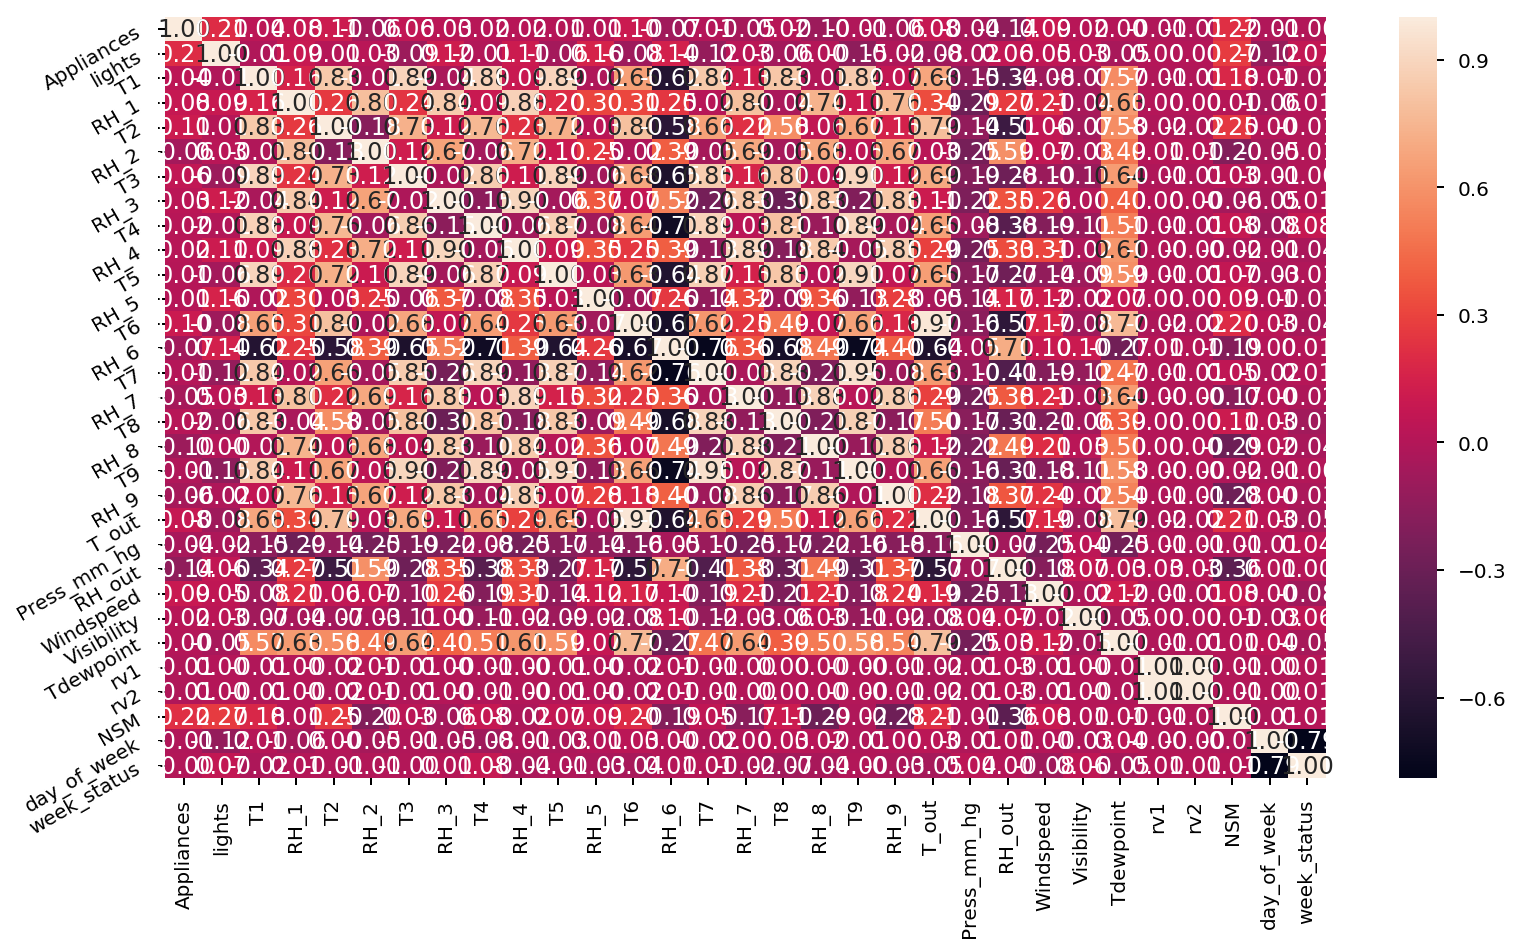

In [110]:
#Correlation and heat map
correlation = df.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Examine pair-wise Relationship

Creating new dataframe 

In [111]:
df_1 = df[['Appliances','T1','RH_1','T2','RH_2','T3','RH_3']]

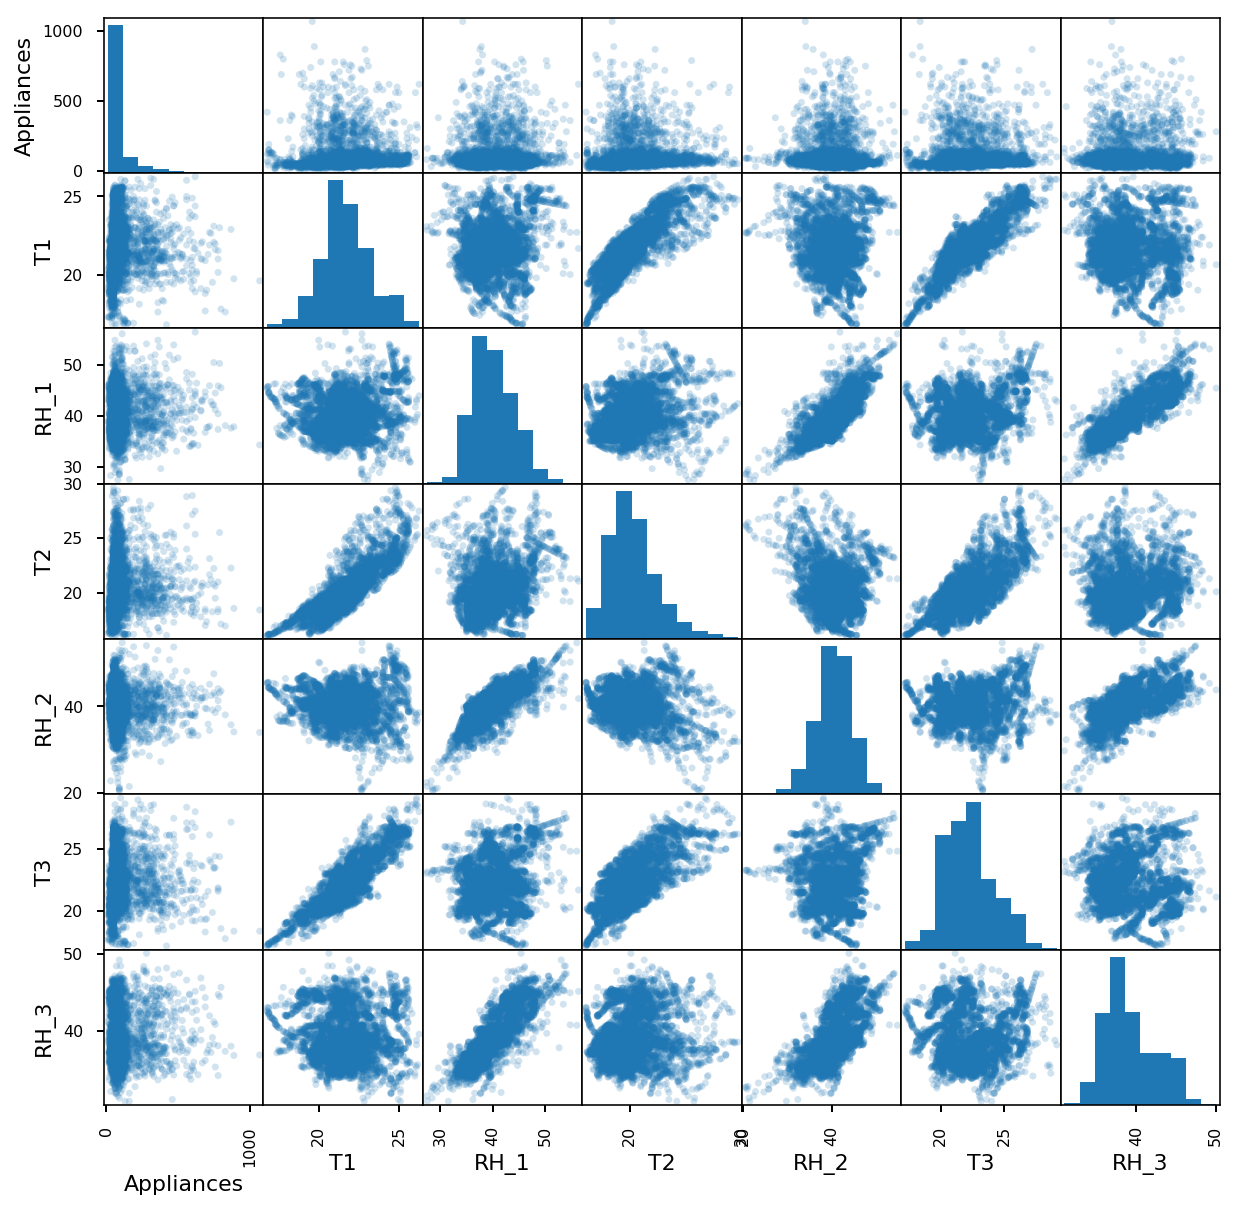

In [112]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_1[['Appliances','T1','RH_1','T2','RH_2','T3','RH_3']],alpha=0.2,diagonal='hist',ax=ax);

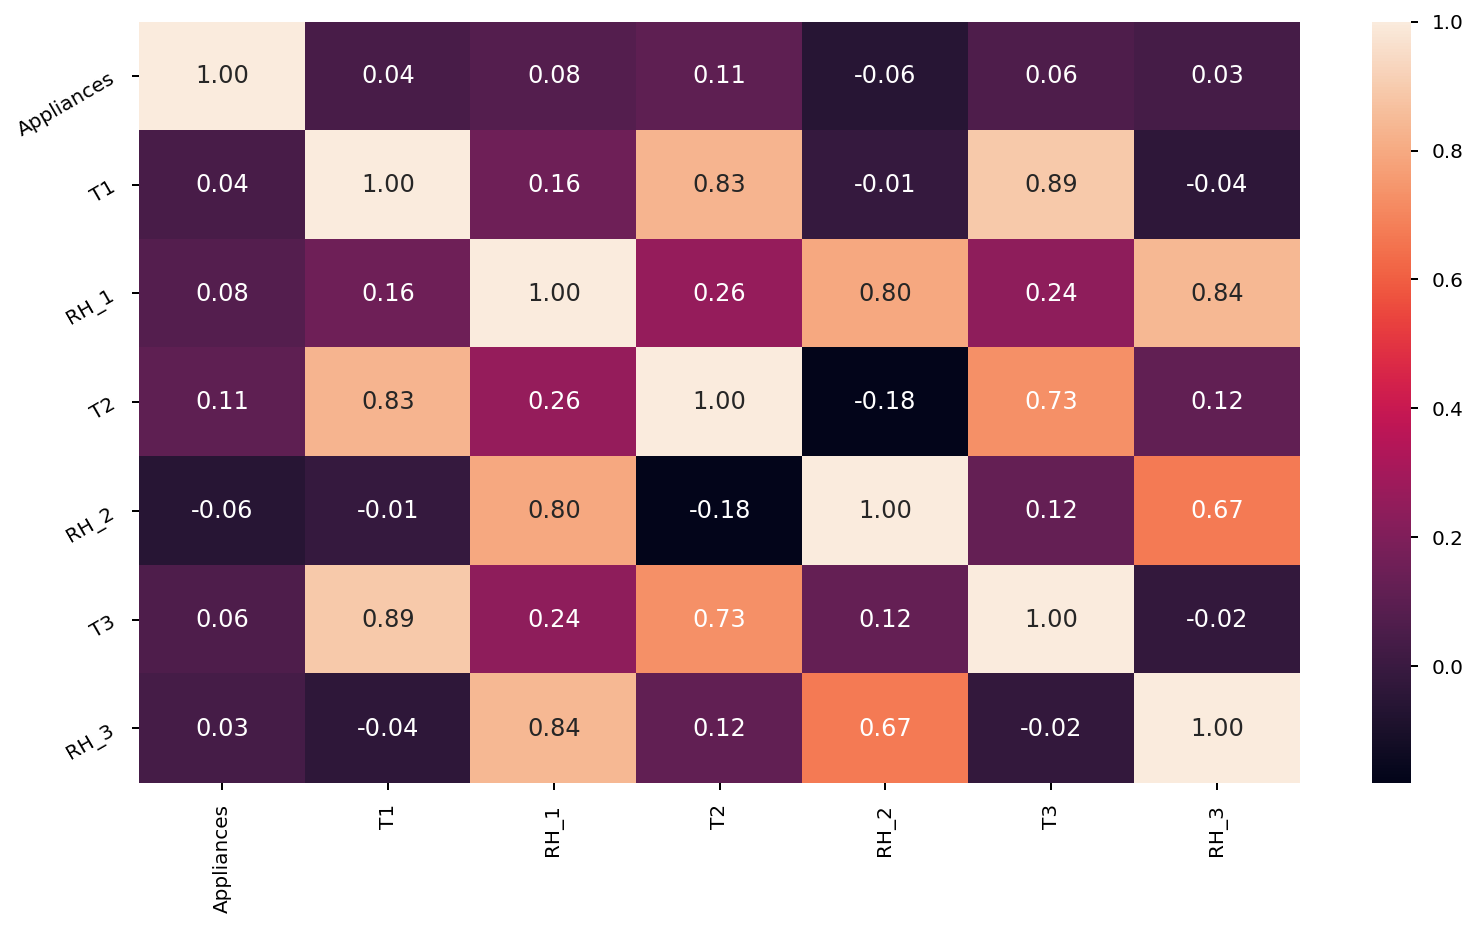

In [113]:
#Correlation and heat map
correlation = df_1.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [114]:
df_2 = df[['Appliances','T4','RH_4','T5','RH_5','T6','RH_6']]

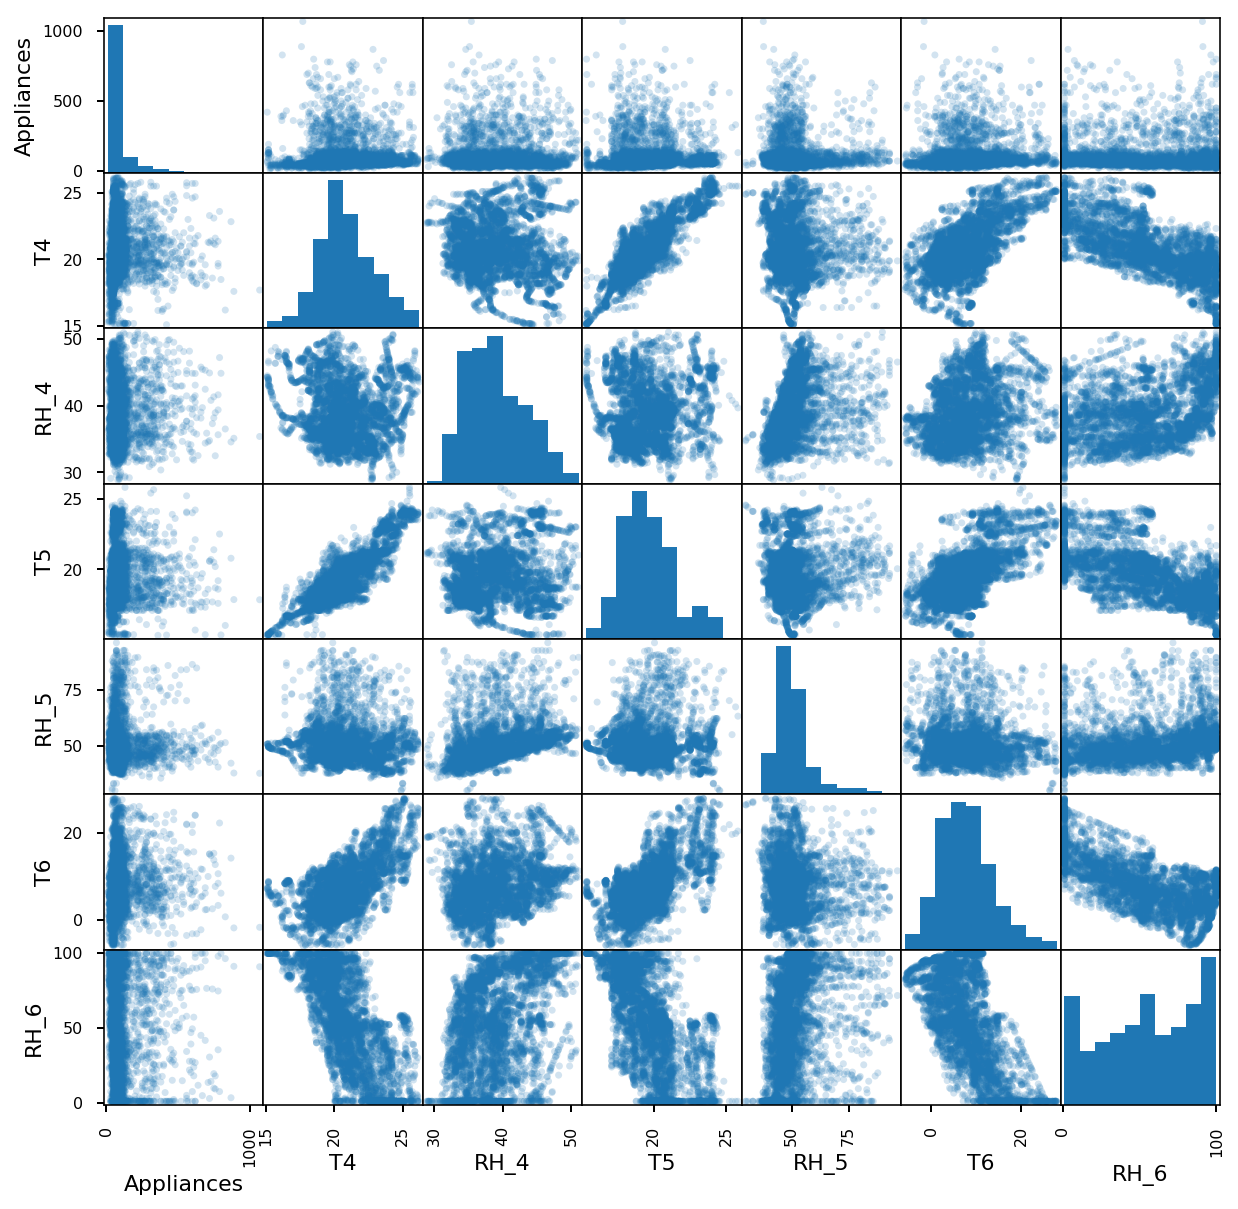

In [115]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_2[['Appliances','T4','RH_4','T5','RH_5','T6','RH_6']],alpha=0.2,diagonal='hist',ax=ax);

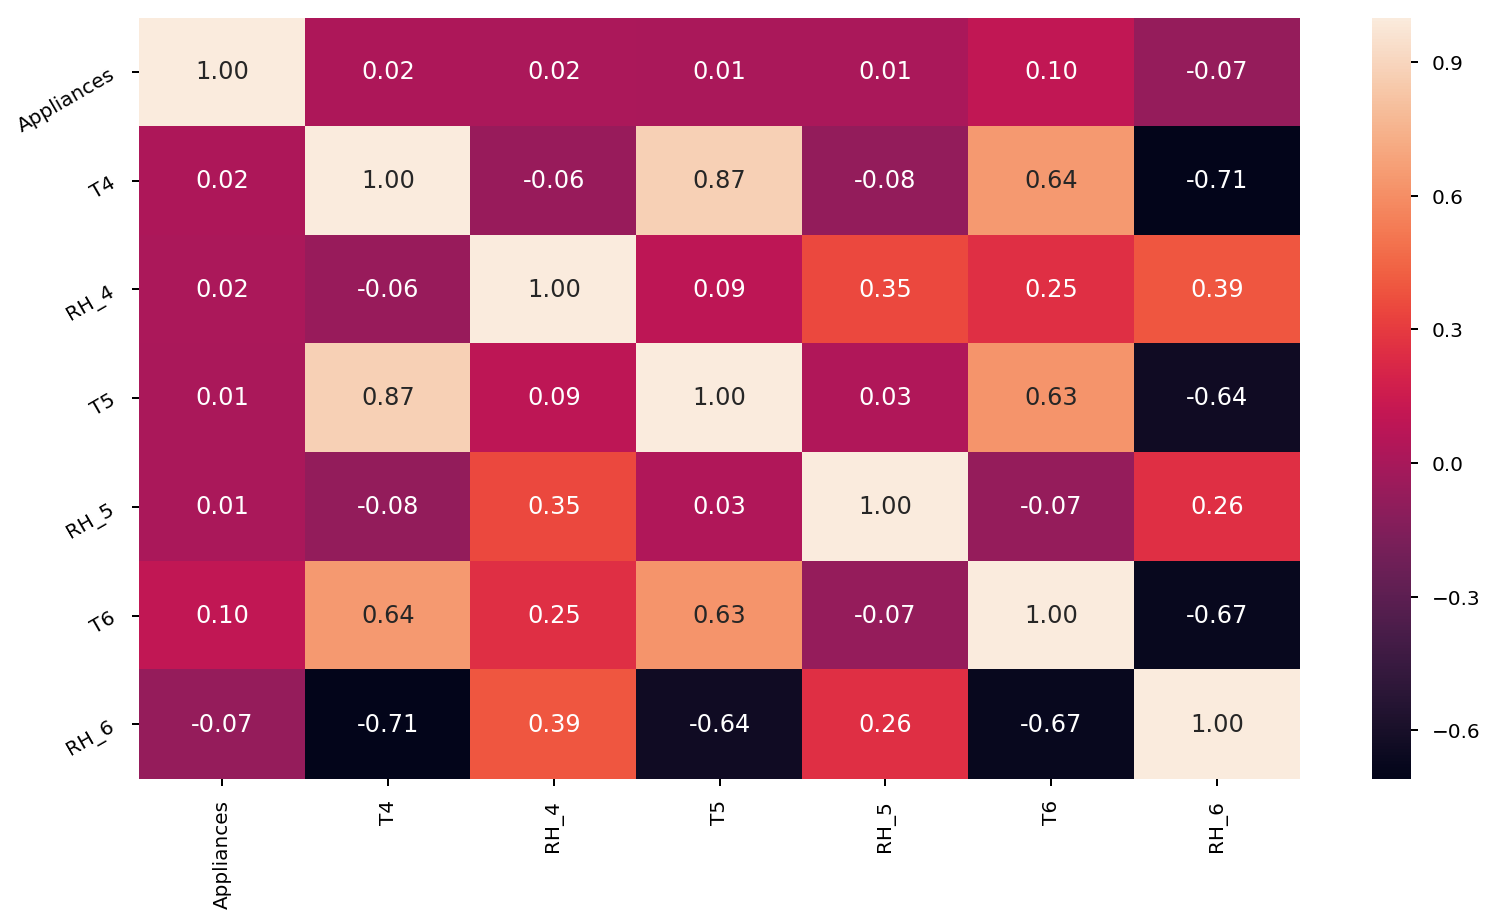

In [116]:
#Correlation and heat map
correlation = df_2.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [117]:
df_3=df[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']]

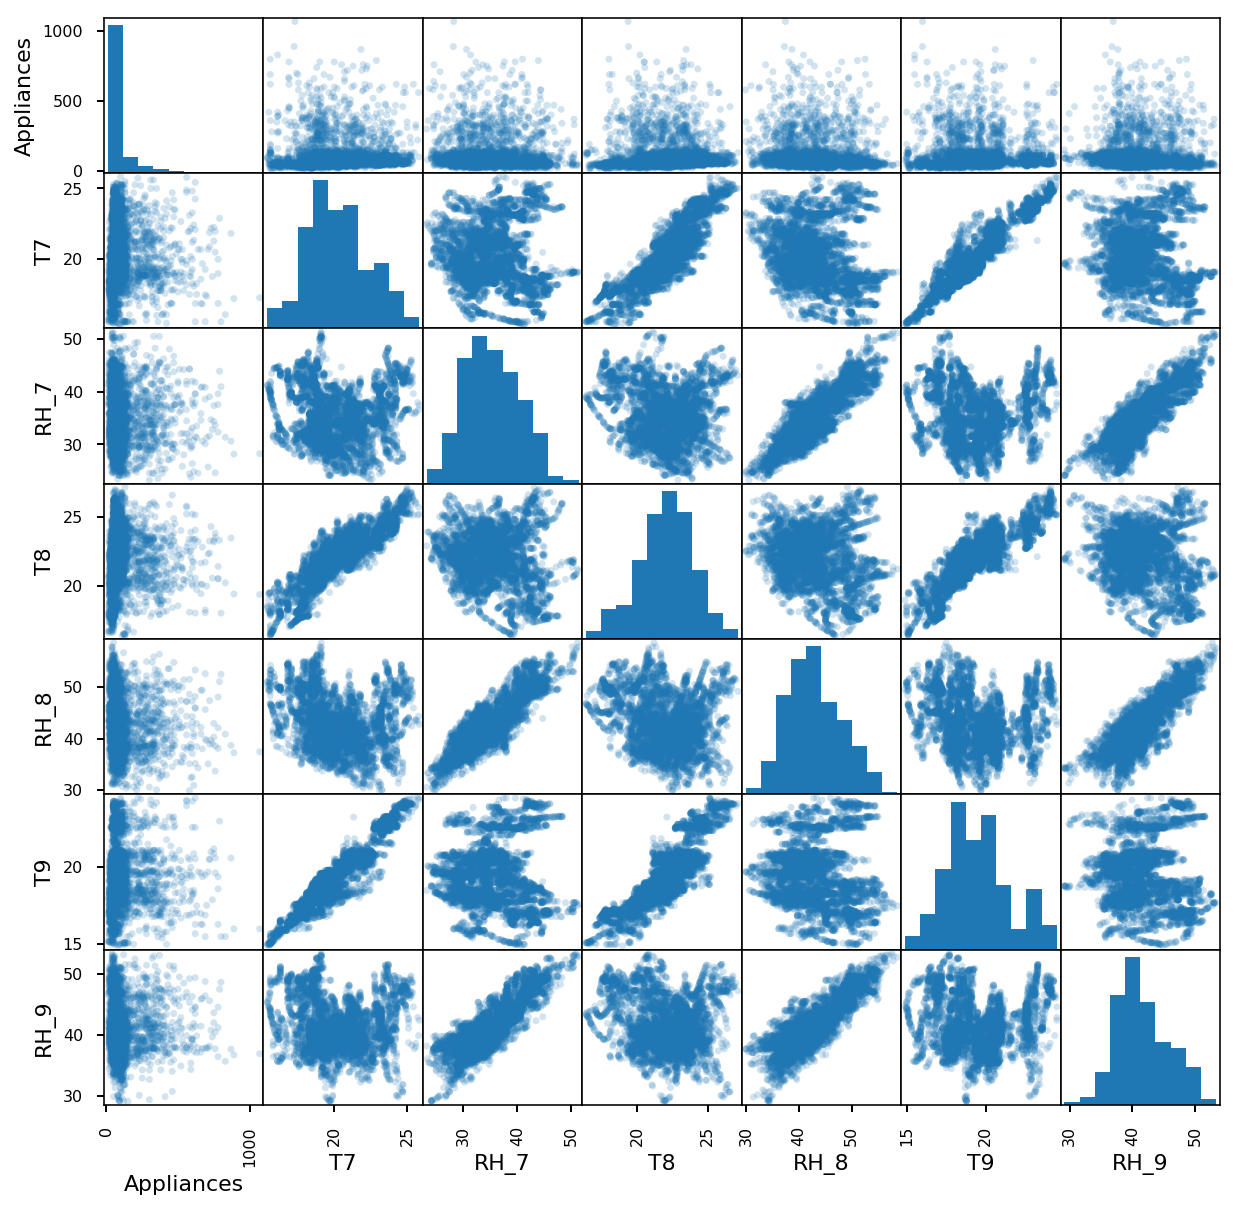

In [118]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_3[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']],alpha=0.2,diagonal='hist',ax=ax);

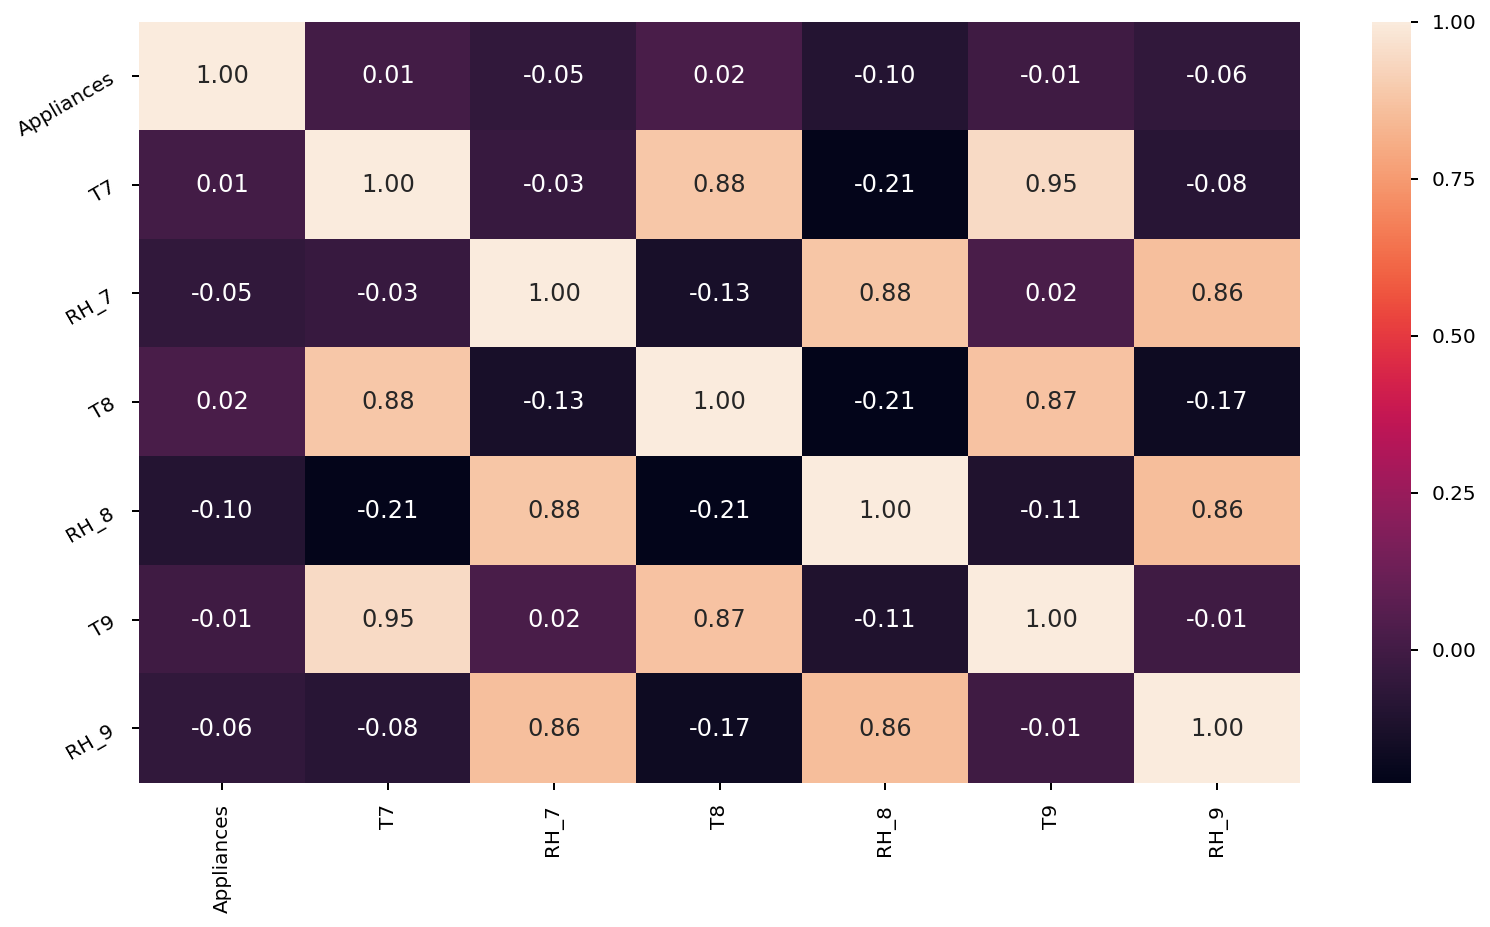

In [119]:
#Correlation and heat map
correlation = df_3.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [120]:
df_4 = df[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]

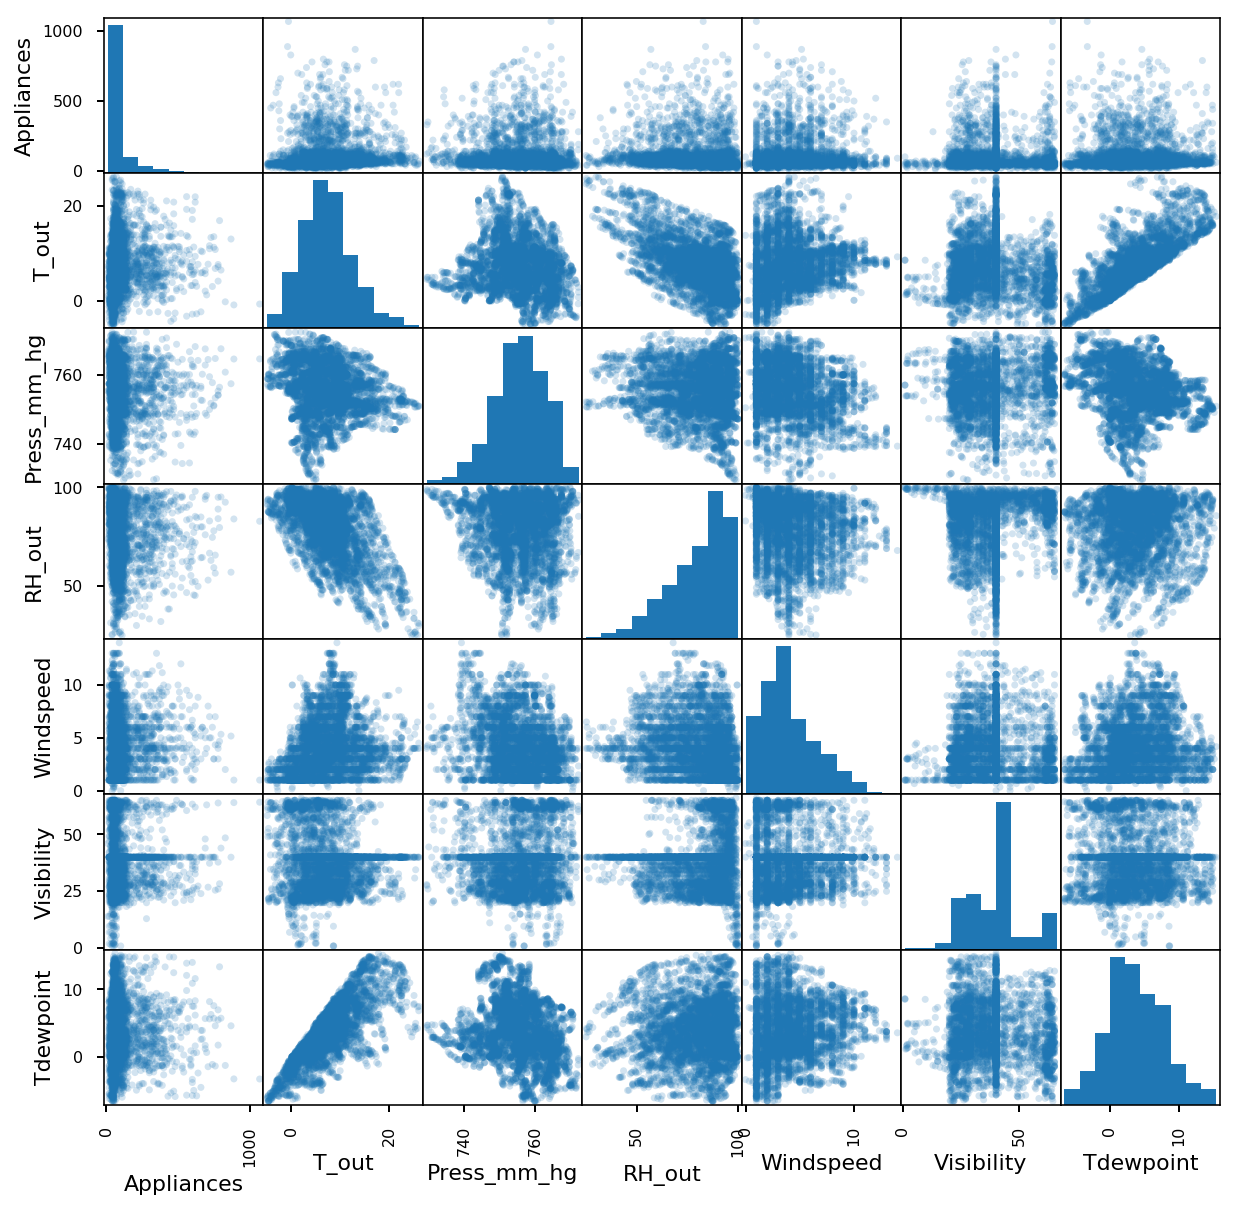

In [121]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_4[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']],alpha=0.2,diagonal='hist',ax=ax);

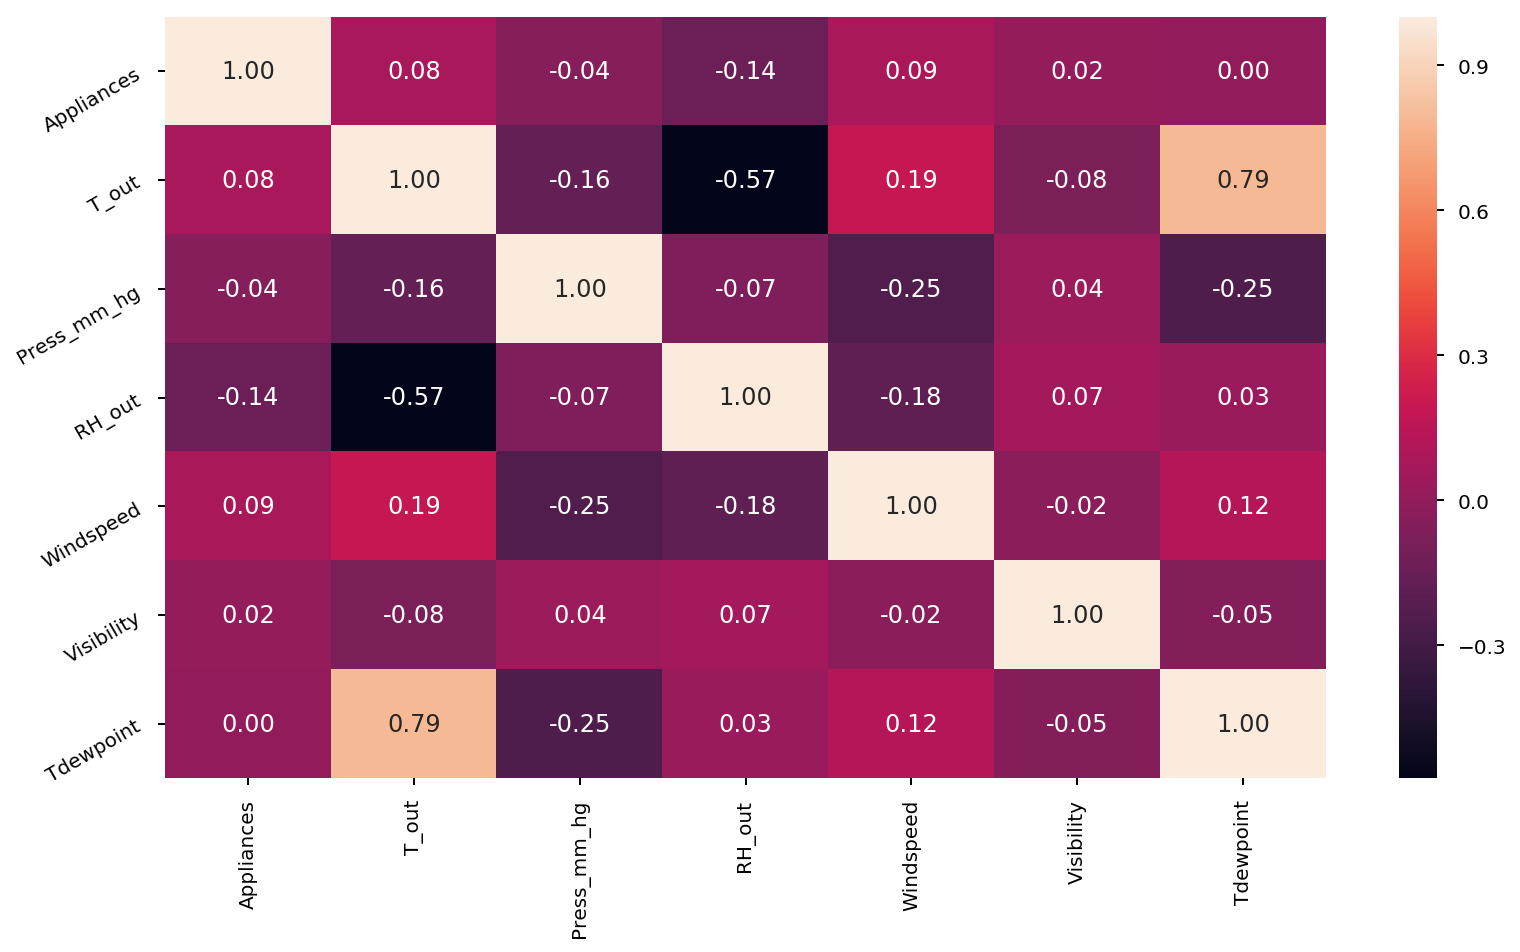

In [122]:
#Correlation and heat map
correlation = df_4.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Examine relationship between Consumption and day of the week

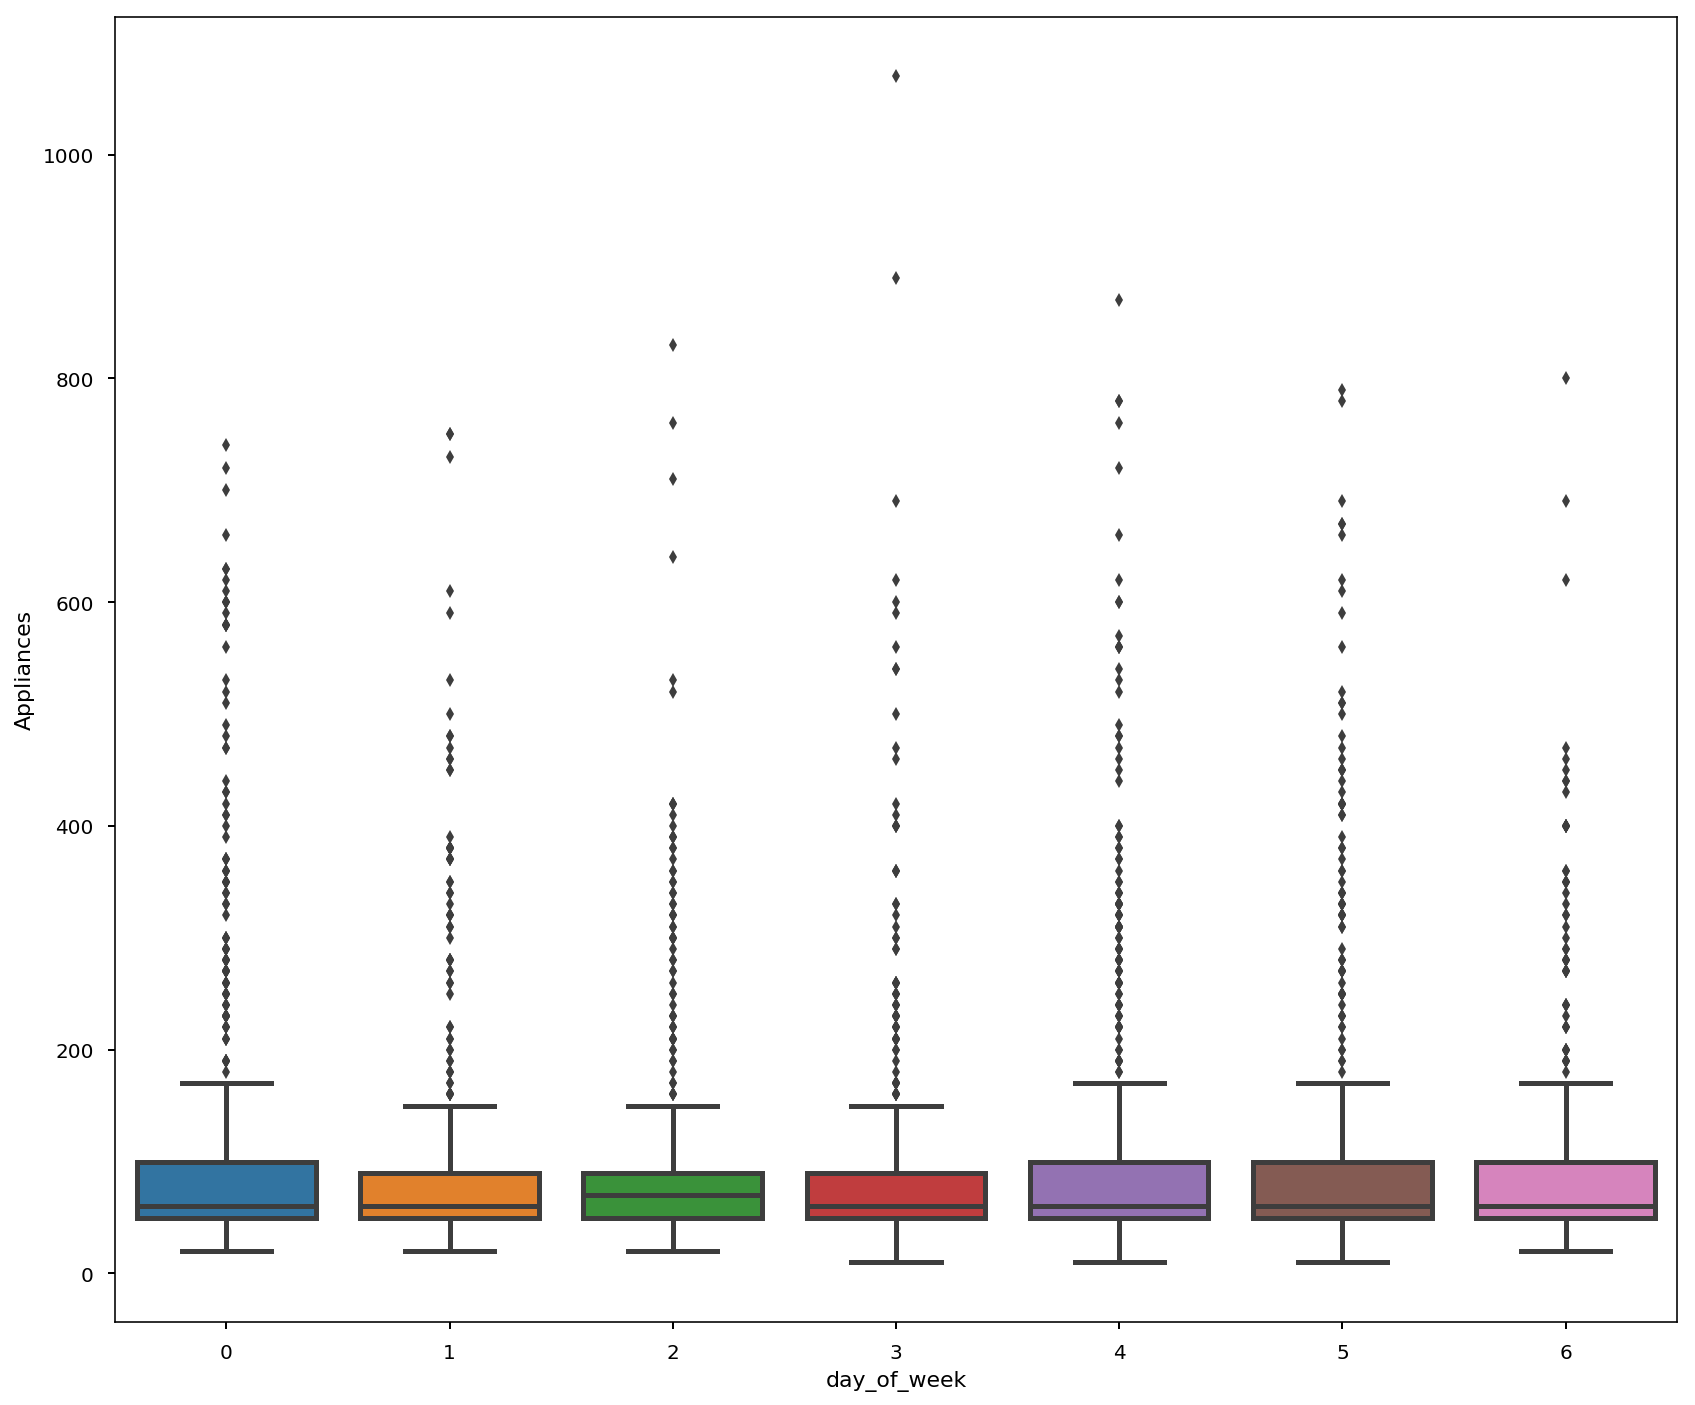

In [123]:
plt.figure(figsize=(14,12))
sns.boxplot(x='day_of_week', y='Appliances', data=df);

## Plotting Boxplots to observe the dispersion of the data and to check for outliers

{'boxes': [<matplotlib.lines.Line2D at 0x18ad717a940>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad66c33c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad66c3240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad66c3d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad717add8>,
  <matplotlib.lines.Line2D at 0x18ad8801358>]}

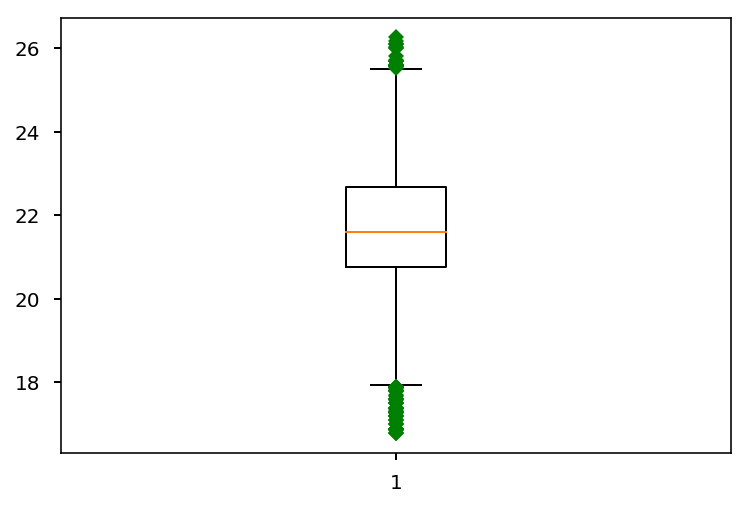

In [124]:
plt.figure()
plt.boxplot(df['T1'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad66cebe0>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad630df60>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad5a739b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad5a736d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad630d5f8>,
  <matplotlib.lines.Line2D at 0x18ad630d240>]}

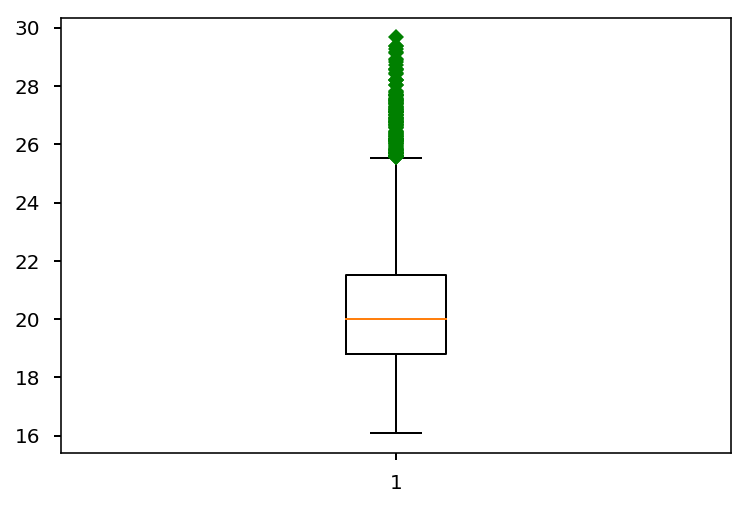

In [125]:
plt.figure()
plt.boxplot(df['T2'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad57047f0>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad6d16b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad692bef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad692b438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad5704eb8>,
  <matplotlib.lines.Line2D at 0x18ad57042b0>]}

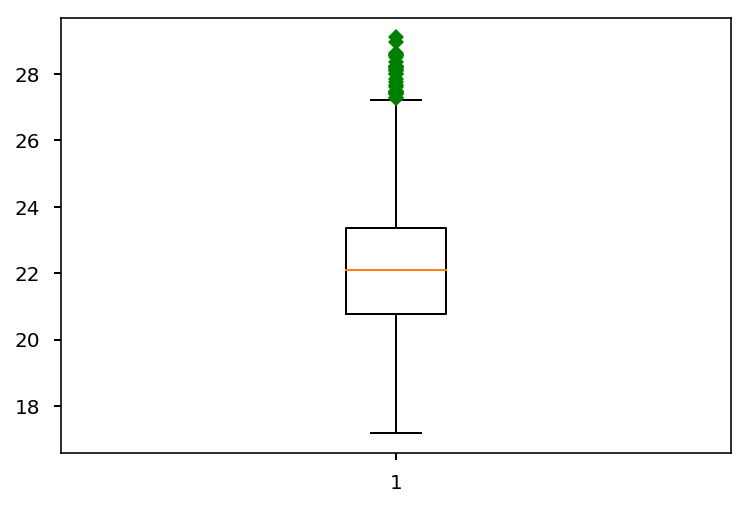

In [126]:
plt.figure()
plt.boxplot(df['T3'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad64c4048>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad5bdd860>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad6a41a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad5bdd8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad64c4b70>,
  <matplotlib.lines.Line2D at 0x18ad5bdd5c0>]}

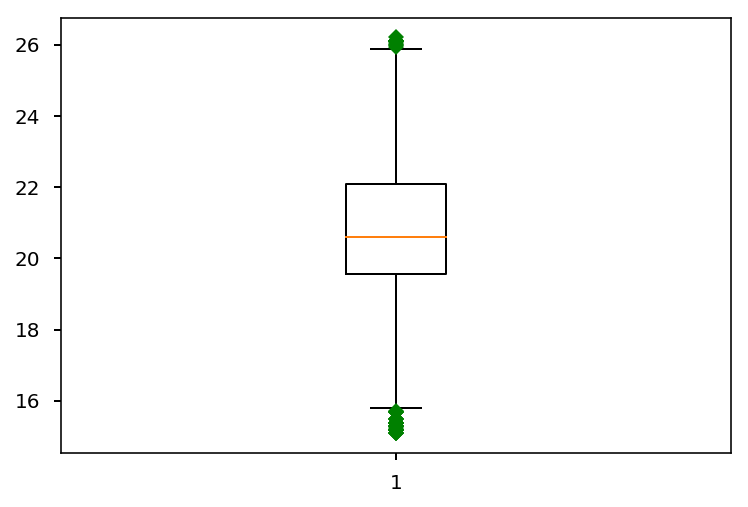

In [127]:
plt.figure()
plt.boxplot(df['T4'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad63d8320>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad63d8208>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad64db390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad64db5f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad63d85f8>,
  <matplotlib.lines.Line2D at 0x18ad63d8d68>]}

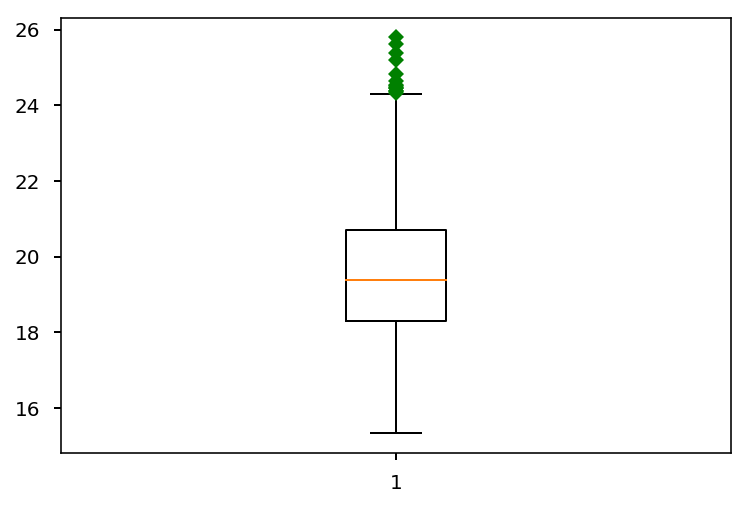

In [128]:
plt.figure()
plt.boxplot(df['T5'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad5b57e10>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad5b573c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad5bd9fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad5bd99b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad5b57a20>,
  <matplotlib.lines.Line2D at 0x18ad5b571d0>]}

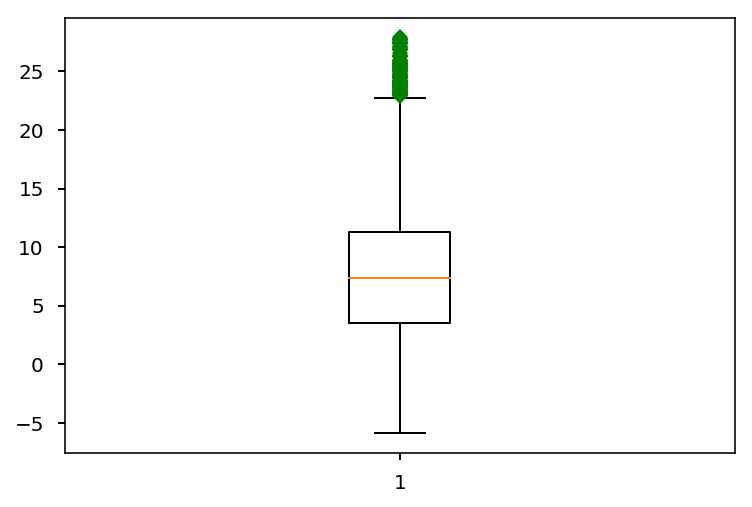

In [129]:
plt.figure()
plt.boxplot(df['T6'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18adda07550>],
 'caps': [<matplotlib.lines.Line2D at 0x18adda07cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad56b0c88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad56b0588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18adda07518>,
  <matplotlib.lines.Line2D at 0x18adda07048>]}

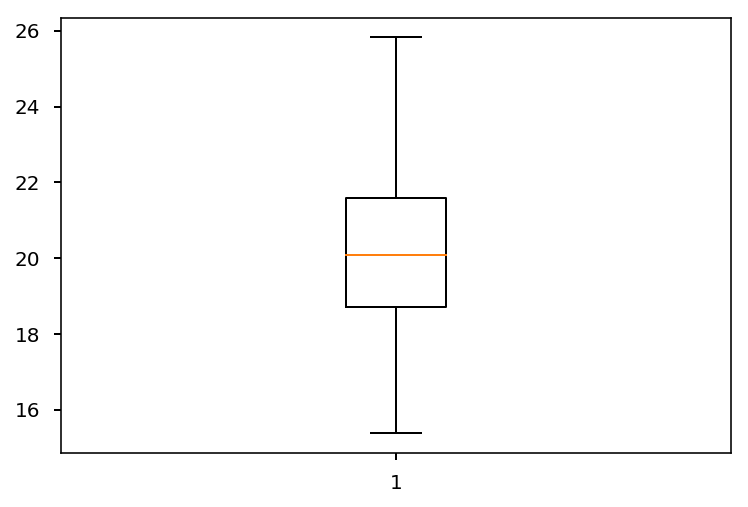

In [130]:
plt.figure()
plt.boxplot(df['T7'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad69b1ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad6a3ae80>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad5840588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad5840898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad69b1f28>,
  <matplotlib.lines.Line2D at 0x18ad6a3a6a0>]}

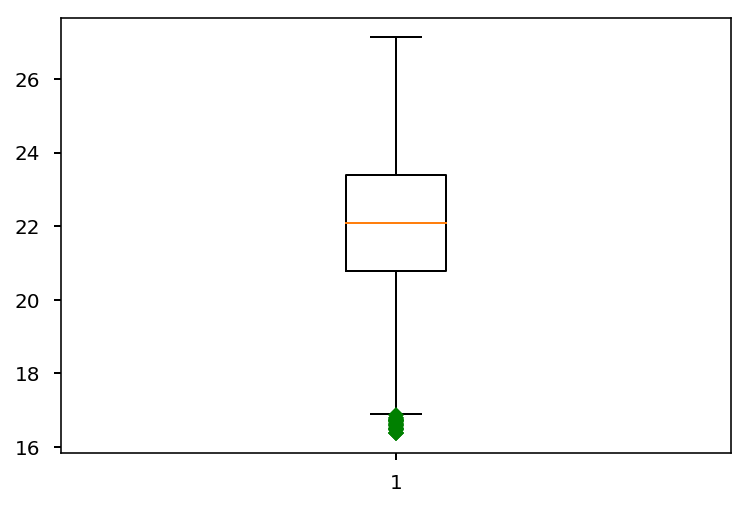

In [131]:
plt.figure()
plt.boxplot(df['T8'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad583bd30>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad56b2c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad69ca278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad56b25c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad66fc4e0>,
  <matplotlib.lines.Line2D at 0x18ad66fc978>]}

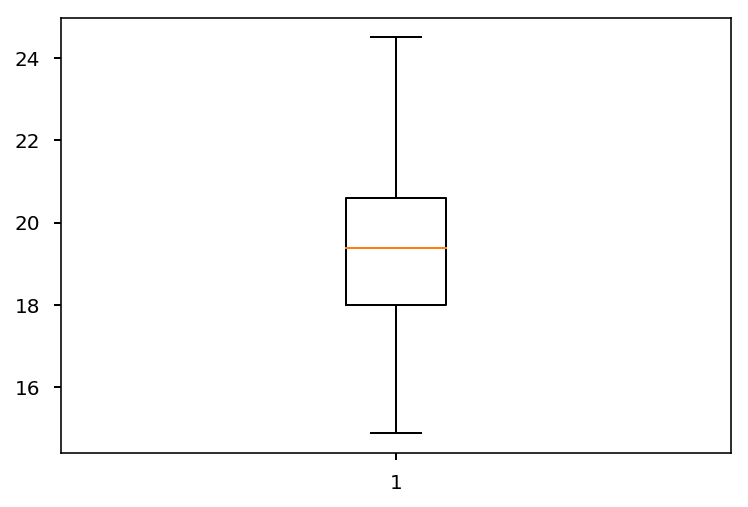

In [132]:
plt.figure()
plt.boxplot(df['T9'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad64d0e10>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad64d0208>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad6e0c7b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad6e0c2b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad64d0e48>,
  <matplotlib.lines.Line2D at 0x18ad64d00b8>]}

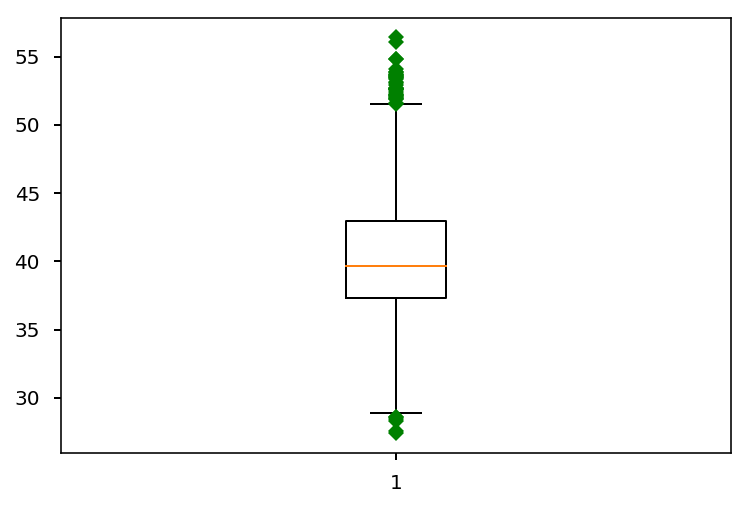

In [133]:
plt.figure()
plt.boxplot(df['RH_1'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18adda40f98>],
 'caps': [<matplotlib.lines.Line2D at 0x18adcd290b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad54ccd68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18adcd29898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18adda40dd8>,
  <matplotlib.lines.Line2D at 0x18adda400f0>]}

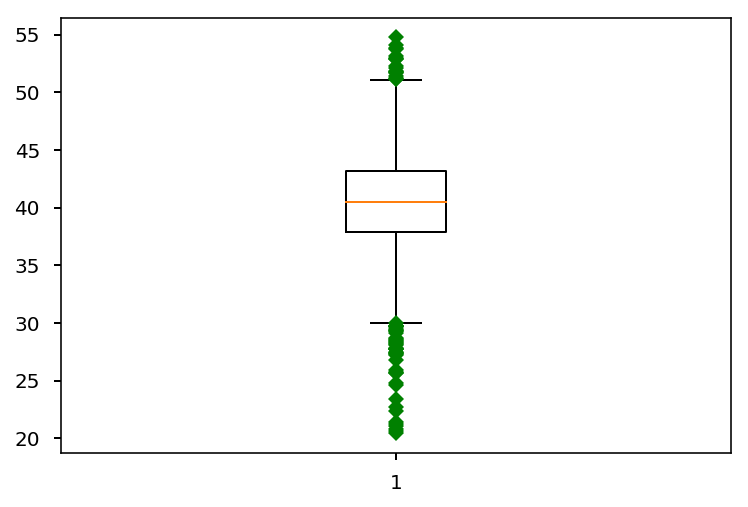

In [134]:
plt.figure()
plt.boxplot(df['RH_2'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad83c1400>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad6653c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad6764be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad6653240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad83c1c88>,
  <matplotlib.lines.Line2D at 0x18ad83c1748>]}

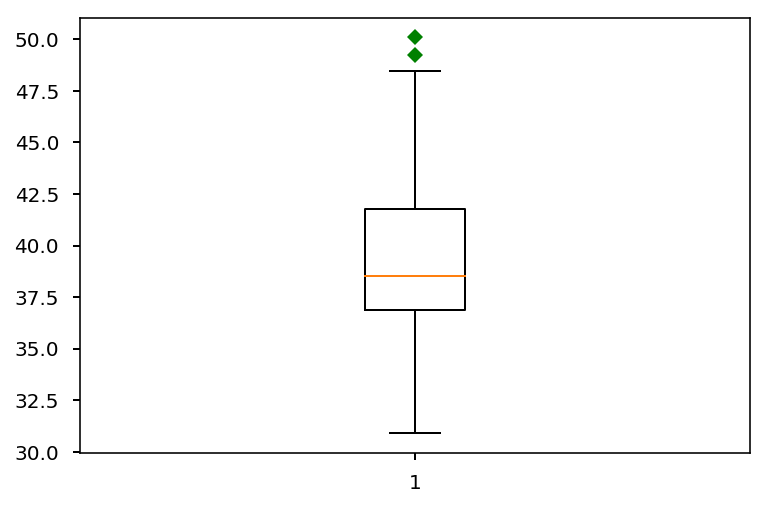

In [135]:
plt.figure()
plt.boxplot(df['RH_3'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad70b5668>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad81e5518>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad64e0940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad6d91908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad70c8240>,
  <matplotlib.lines.Line2D at 0x18ad65f1b70>]}

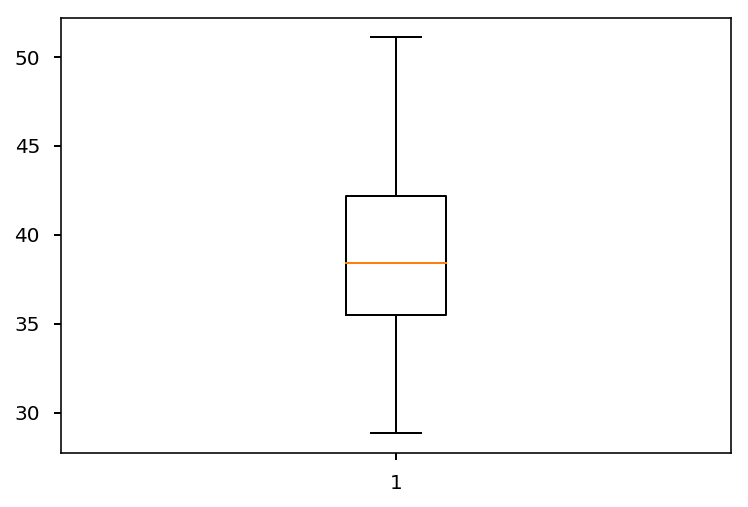

In [136]:
plt.figure()
plt.boxplot(df['RH_4'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad92d1898>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad92d1550>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad8a4cc88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad68ca550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad92d1860>,
  <matplotlib.lines.Line2D at 0x18ad92d19e8>]}

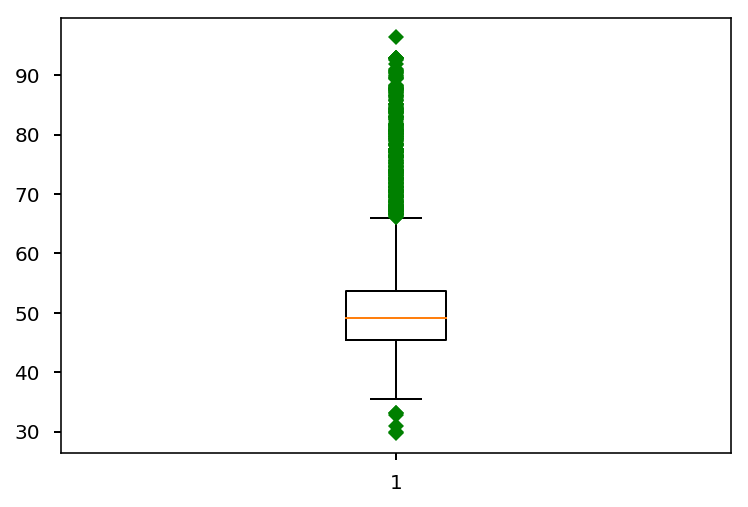

In [137]:
plt.figure()
plt.boxplot(df['RH_5'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad825abe0>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad56b2c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x18adc58d908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18adc58d7f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad6873b70>,
  <matplotlib.lines.Line2D at 0x18ad82686d8>]}

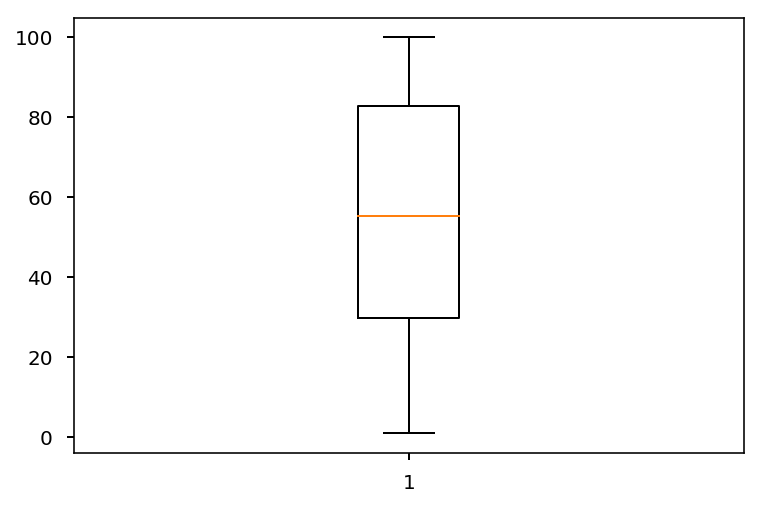

In [138]:
plt.figure()
plt.boxplot(df['RH_6'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad6ff3278>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad5b4c8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad5bbf198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad5bbf438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad6ff3dd8>,
  <matplotlib.lines.Line2D at 0x18ad5b4c908>]}

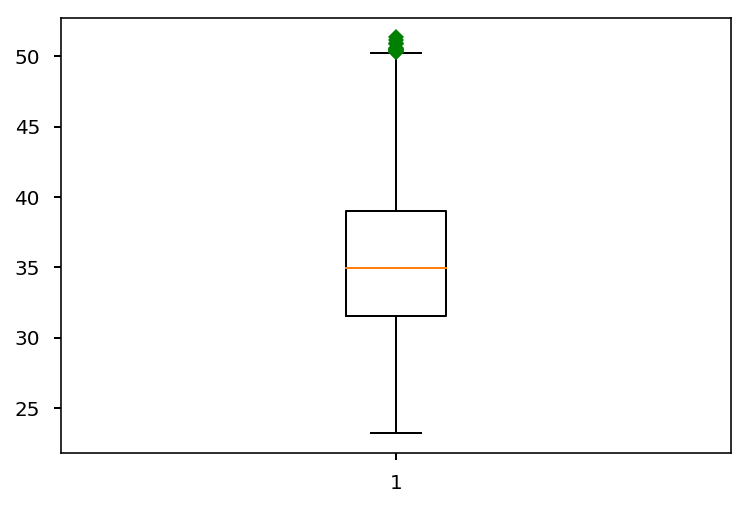

In [139]:
plt.figure()
plt.boxplot(df['RH_7'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18adc596f60>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad8325da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18add9005c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad8325cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18adc596470>,
  <matplotlib.lines.Line2D at 0x18adc596c18>]}

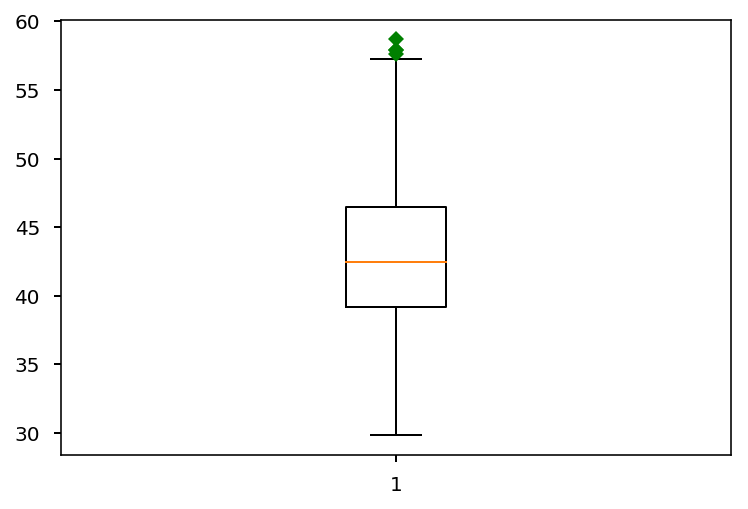

In [140]:
plt.figure()
plt.boxplot(df['RH_8'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad92ed4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x18add8ec4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad59e3b38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad59e3198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad92eda20>,
  <matplotlib.lines.Line2D at 0x18add8ecba8>]}

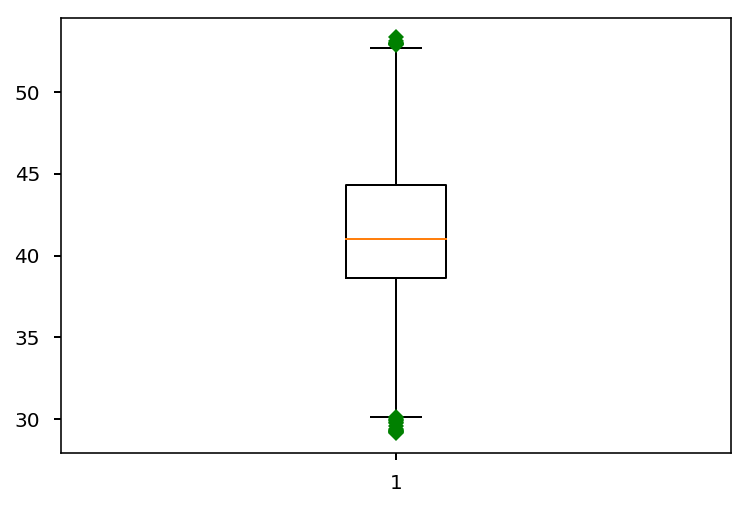

In [141]:
plt.figure()
plt.boxplot(df['RH_9'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad8c8b128>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad83ea1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad70472b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad83eadd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad8c8b4a8>,
  <matplotlib.lines.Line2D at 0x18ad8c8b048>]}

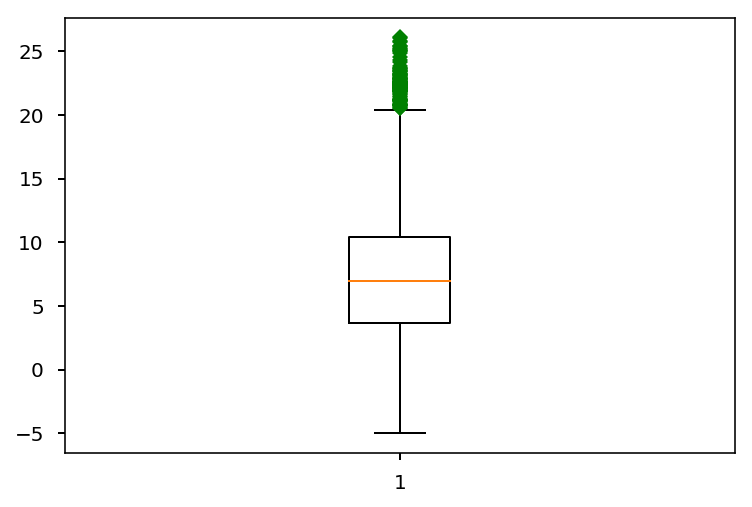

In [142]:
plt.figure()
plt.boxplot(df['T_out'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad5b0cf98>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad5bd3da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad5bd3ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad5bd33c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad5b0cd68>,
  <matplotlib.lines.Line2D at 0x18ad5b0c6a0>]}

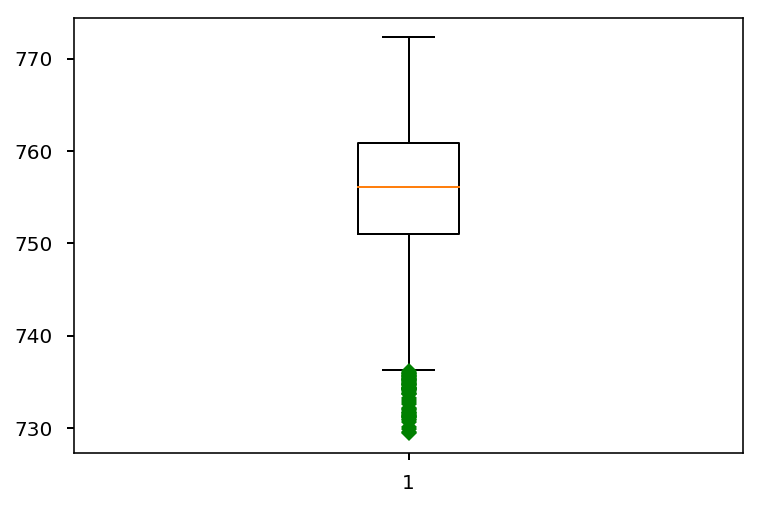

In [143]:
plt.figure()
plt.boxplot(df['Press_mm_hg'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad83833c8>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad8428438>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad677b550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad8428668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad8383b70>,
  <matplotlib.lines.Line2D at 0x18ad8428160>]}

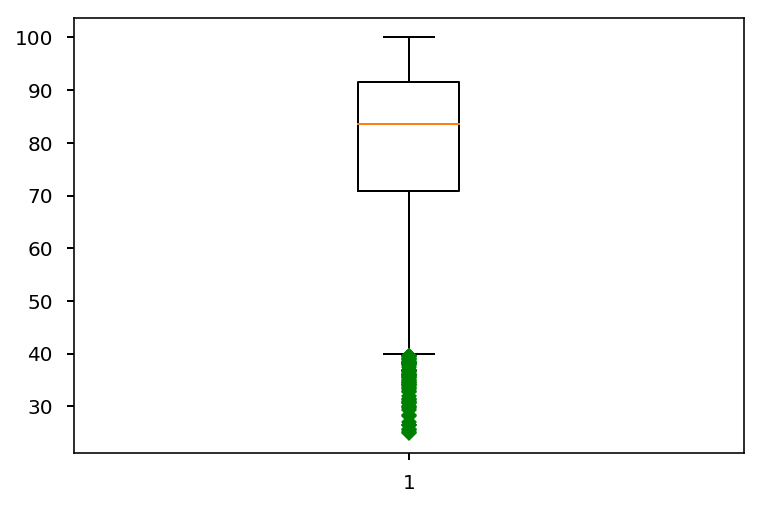

In [144]:
plt.figure()
plt.boxplot(df['RH_out'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad54ed5f8>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad54ed828>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ad673ea58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ad673e630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad54ede48>,
  <matplotlib.lines.Line2D at 0x18ad54ed5c0>]}

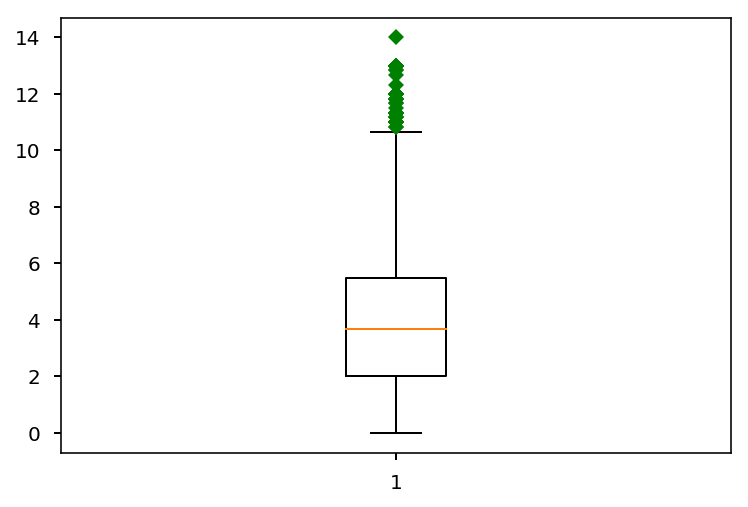

In [145]:
plt.figure()
plt.boxplot(df['Windspeed'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18adcb19358>],
 'caps': [<matplotlib.lines.Line2D at 0x18adcb0c390>,
 'fliers': [<matplotlib.lines.Line2D at 0x18adcb1d0f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18adcb0cc50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18adcb19c88>,
  <matplotlib.lines.Line2D at 0x18adcb19fd0>]}

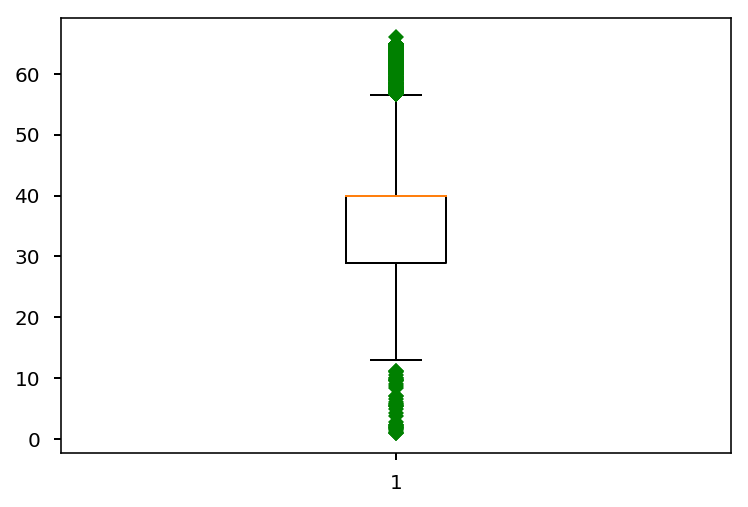

In [146]:
plt.figure()
plt.boxplot(df['Visibility'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x18ad6531fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x18ad651db38>,
 'fliers': [<matplotlib.lines.Line2D at 0x18add868898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18add868438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18ad651d198>,
  <matplotlib.lines.Line2D at 0x18ad651d6d8>]}

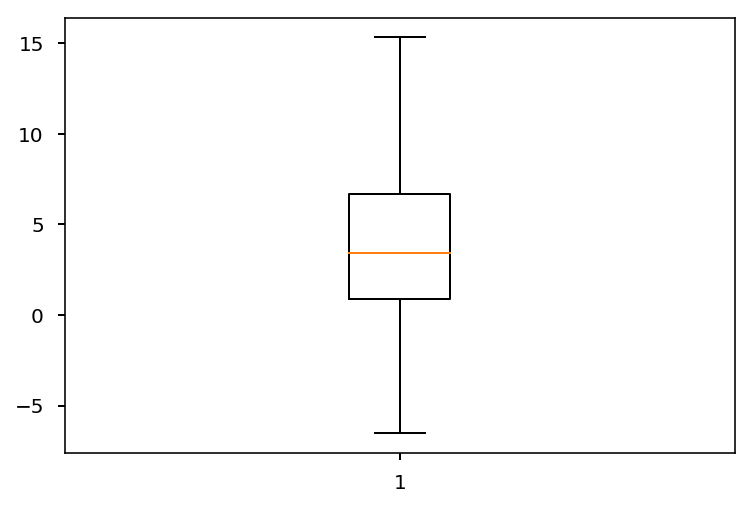

In [147]:
plt.figure()
plt.boxplot(df['Tdewpoint'],0,'gD')

From the above plots we concluded that the data is widely spread above the median which is clear indication of outliers

# Now Detecting outliers for each variable

To detect outliers in the dataset we will proceed with the following steps
>1. Arrange all the dataset points and calculate median
>2. Calculate the upper quartile
>3. Calculate the lower quartile
>> Since the above three aspects are given in the dataset
>4. Calculate the Interquartile Range
>> It is the product of difference of the upper quartile and lower quartile and numeric value of 1.5
>5. Calculate the inner fences for the dataset
>> It is set of numerical boundaries which is classified as major and minor outlier
>>>Major outlier = Upper Quartile + Interquartile rannge
>>>| Minor outlier = Lower Quartlie - Interquartile rannge

         


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 34 columns):
date           4932 non-null datetime64[ns]
Appliances     4932 non-null int64
lights         4932 non-null int64
T1             4932 non-null float64
RH_1           4932 non-null float64
T2             4932 non-null float64
RH_2           4932 non-null float64
T3             4932 non-null float64
RH_3           4932 non-null float64
T4             4932 non-null float64
RH_4           4932 non-null float64
T5             4932 non-null float64
RH_5           4932 non-null float64
T6             4932 non-null float64
RH_6           4932 non-null float64
T7             4932 non-null float64
RH_7           4932 non-null float64
T8             4932 non-null float64
RH_8           4932 non-null float64
T9             4932 non-null float64
RH_9           4932 non-null float64
T_out          4932 non-null float64
Press_mm_hg    4932 non-null float64
RH_out         4932 non-null float64
Wi

# Removing Outliers from specific variables

In [155]:
#dropping outliers from T1
df= df.drop(df[(df['T1']>25.20) | (df['T1']<18.4)].index)

In [159]:
#dropping outliers from T2
df= df.drop(df[df['T2']>25.6].index)

In [161]:
#dropping outliers from T3
df= df.drop(df[df['T3']>27].index)

In [166]:
#dropping outliers from T1
df= df.drop(df[(df['T4']>25.80) | (df['T4']<16)].index)

In [169]:
#dropping outliers from T5
df= df.drop(df[df['T5']>24.2].index)

In [171]:
#dropping outliers from T6
df= df.drop(df[df['T6']>22].index)

In [174]:
#dropping outliers from T8
df= df.drop(df[df['T8']<17].index)

In [176]:
#dropping outliers from RH_1
df= df.drop(df[(df['RH_1']>52) | (df['RH_1']<29)].index)

In [179]:
#dropping outliers from RH_2
df= df.drop(df[(df['RH_2']>52) | (df['RH_2']<30.50)].index)

In [183]:
#dropping outliers from RH_3
df= df.drop(df[df['RH_3']>47].index)

In [189]:
#dropping outliers from RH_5
df= df.drop(df[(df['RH_5']>64) | (df['RH_5']<35)].index)

In [192]:
#dropping outliers from RH_7
df= df.drop(df[df['RH_7']>47].index)

In [196]:
#dropping outliers from RH_8
df= df.drop(df[df['RH_8']>55].index)

In [200]:
#dropping outliers from RH_9
df= df.drop(df[(df['RH_9']>51.5) | (df['RH_9']<32)].index)

In [205]:
#dropping outliers from T_out
df= df.drop(df[df['T_out']>18].index)

In [209]:
#dropping outliers from RH_out
df= df.drop(df[df['RH_out']<44].index)

In [211]:
#dropping outliers from Press_mm_hg
df= df.drop(df[df['Press_mm_hg']<737].index)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 10 to 4886
Data columns (total 34 columns):
date           3842 non-null datetime64[ns]
Appliances     3842 non-null int64
lights         3842 non-null int64
T1             3842 non-null float64
RH_1           3842 non-null float64
T2             3842 non-null float64
RH_2           3842 non-null float64
T3             3842 non-null float64
RH_3           3842 non-null float64
T4             3842 non-null float64
RH_4           3842 non-null float64
T5             3842 non-null float64
RH_5           3842 non-null float64
T6             3842 non-null float64
RH_6           3842 non-null float64
T7             3842 non-null float64
RH_7           3842 non-null float64
T8             3842 non-null float64
RH_8           3842 non-null float64
T9             3842 non-null float64
RH_9           3842 non-null float64
T_out          3842 non-null float64
Press_mm_hg    3842 non-null float64
RH_out         3842 non-null float64
W